In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
path = '/Users/shantamaraj/Desktop/Basketball Analytics/Processed Data/nba_3pt_data.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,season_start,season_end,player,team,games_played,minutes_played,3PM,3PA,3P%,assists,turnovers,total_points,country,team_fullname,state
0,2012,2013,Kevin Durant,OKC,81,3119,139,334,0.416,374,280,2280,United States of America,Oklahoma City Thunder,Oklahoma
1,2012,2013,Kobe Bryant,LAL,78,3013,132,407,0.324,469,287,2133,United States of America,Los Angeles Lakers,California
2,2012,2013,LeBron James,MIA,76,2877,103,254,0.406,551,226,2036,United States of America,Miami Heat,Florida
3,2012,2013,James Harden,HOU,78,2985,179,486,0.368,455,295,2023,United States of America,Houston Rockets,Texas
4,2012,2013,Carmelo Anthony,NYK,67,2482,157,414,0.379,171,175,1920,United States of America,New York Knicks,New York


In [5]:
df.shape

(8046, 15)

In [6]:
#Check for missing values
print(df.isnull().sum())

season_start       0
season_end         0
player             0
team               0
games_played       0
minutes_played     0
3PM                0
3PA                0
3P%                0
assists            0
turnovers          0
total_points       0
country            0
team_fullname     17
state             17
dtype: int64


In [7]:
df[df.isnull().any(axis=1)]

,season_start,season_end,player,team,games_played,minutes_played,3PM,3PA,3P%,assists,turnovers,total_points,country,team_fullname,state
28,2012,2013,Ryan Anderson,NOH,81,2503,213,557,0.382,97,97,1309,United States of America,NaN,NaN
57,2012,2013,Greivis Vasquez,NOH,78,2685,83,243,0.342,704,247,1083,United States of America,NaN,NaN
86,2012,2013,Robin Lopez,NOH,82,2136,0,0,0.000,64,110,929,United States of America,NaN,NaN
99,2012,2013,Anthony Davis,NOH,64,1846,0,6,0.000,63,89,867,United States of America,NaN,NaN
137,2012,2013,Eric Gordon,NOH,42,1264,56,173,0.324,137,117,713,United States of America,NaN,NaN
185,2012,2013,Al-Farouq Aminu,NOH,76,2066,4,19,0.211,103,116,555,United States of America,NaN,NaN
186,2012,2013,Brian Roberts,NOH,78,1324,59,153,0.386,219,71,555,United States of America,NaN,NaN
227,2012,2013,Jason Smith,NOH,51,876,0,4,0.000,34,55,420,United States of America,NaN,NaN
241,2012,2013,Austin Rivers,NOH,61,1418,28,86,0.326,127,74,377,United States of America,NaN,NaN
249,2012,2013,Roger Mason Jr.,NOH,69,1219,66,159,0.415,74,51,369,United States of America,NaN,NaN


In [8]:
# Fill missing team names and states where team == 'NOH'
df.loc[df['team'] == 'NOH', 'team_fullname'] = 'New Orleans Hornets'
df.loc[df['team'] == 'NOH', 'state'] = 'Louisiana'

In [9]:
df.isnull().sum()

season_start      0
season_end        0
player            0
team              0
games_played      0
minutes_played    0
3PM               0
3PA               0
3P%               0
assists           0
turnovers         0
total_points      0
country           0
team_fullname     0
state             0
dtype: int64

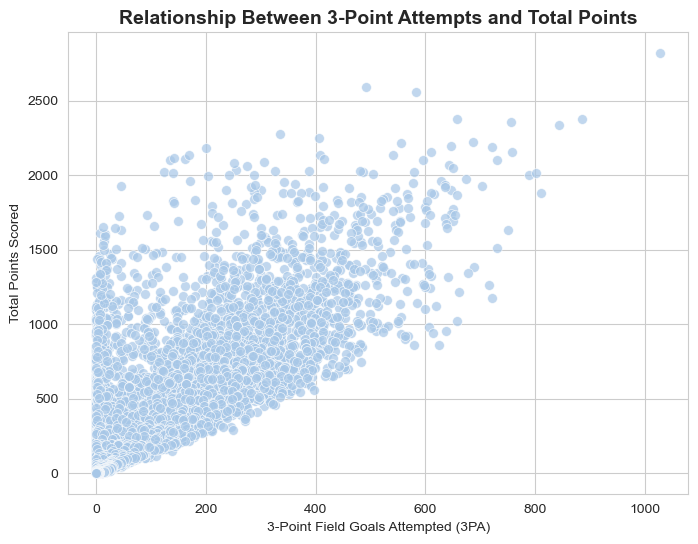

In [24]:
#Explore data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.scatterplot(
    data=df, 
    x='3PA', 
    y='total_points',
    color='#A7C7E7', # pastel blue
    s=50, 
    alpha=0.7
)
plt.title('Relationship Between 3-Point Attempts and Total Points', fontsize=14, fontweight='bold')
plt.xlabel('3-Point Field Goals Attempted (3PA)')
plt.ylabel('Total Points Scored')
plt.show()

### Scatterplot: 

To visually explore potential relationships in the dataset, I created a scatterplot comparing **3-point field goals attempted (3PA)** and **total points scored** for all players.

The scatterplot reveals a clear **positive linear trend**, indicating that players who attempt more 3-point shots tend to score more total points overall. While there is some variation (likely due to differences in accuracy and minutes played), the general upward pattern suggests that 3-point attempts may be a strong predictor of total scoring performance.

This visual evidence supports using **3PA** as the independent variable (X) and **total_points** as the dependent variable (y) in the upcoming regression analysis.



### Hypothesis

Before running the regression analysis, I defined the following hypotheses to test whether 3-point attempts have a significant relationship with total scoring:

- **Null Hypothesis (H₀):**  
  There is **no linear relationship** between the number of 3-point field goals attempted (3PA) and total points scored.  
  In other words, changes in 3PA do **not** significantly predict total_points.

- **Alternative Hypothesis (H₁):**  
  There **is a linear relationship** between the number of 3-point field goals attempted (3PA) and total points scored.  
  In other words, changes in 3PA **significantly predict** total_points.

The regression analysis will help determine whether we can reject the null hypothesis in favor of the alternative, based on the strength and direction of the linear relationship.

In [11]:
#Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.
X = df['3PA'].values.reshape(-1, 1)   # 3-point attempts
y = df['total_points'].values.reshape(-1, 1)  # total points scored
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (8046, 1)
Shape of y: (8046, 1)


In [14]:
# Split the data
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Display the shapes of each set
print("Training set size (X_train):", X_train.shape)
print("Test set size (X_test):", X_test.shape)

Training set size (X_train): (6436, 1)
Test set size (X_test): (1610, 1)


### Split the Data into Training and Test Sets

To prepare for regression modeling, the dataset was divided into a **training set (80%)** and a **test set (20%)** using the `train_test_split()` function from scikit-learn.

The training data will be used to fit the linear regression model, while the test data will help evaluate the model’s predictive accuracy on unseen observations. Setting a fixed `random_state` ensures that the results can be replicated for consistent analysis.

In [13]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict y values using the test data
y_pred = model.predict(X_test)

# Display coefficients
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_)

Intercept (b0): [121.330314]
Slope (b1): [[2.52040103]]


### Run Linear Regression

A simple linear regression model was trained using the `LinearRegression()` function from scikit-learn.  
The model was **fit** to the training data (`X_train`, `y_train`) to learn the linear relationship between **3-point field goals attempted (3PA)** and **total points scored**.

After training, the model was used to **predict** total points (`y_pred`) for the test dataset (`X_test`).  
The regression output includes:
- **Intercept (b₀):** the expected total points when 3PA = 0  
- **Coefficient (b₁):** the average increase in total points for each additional 3-point attempt

Intercept (b₀ = 121.33):
When a player attempts zero 3-point shots, they still average roughly 121 total points, likely from 2-pointers and free throws.

Slope (b₁ = 2.52):
For every additional 3-point attempt, a player’s total points increase by about 2.52 points on average — showing a strong positive relationship between 3PA and scoring.

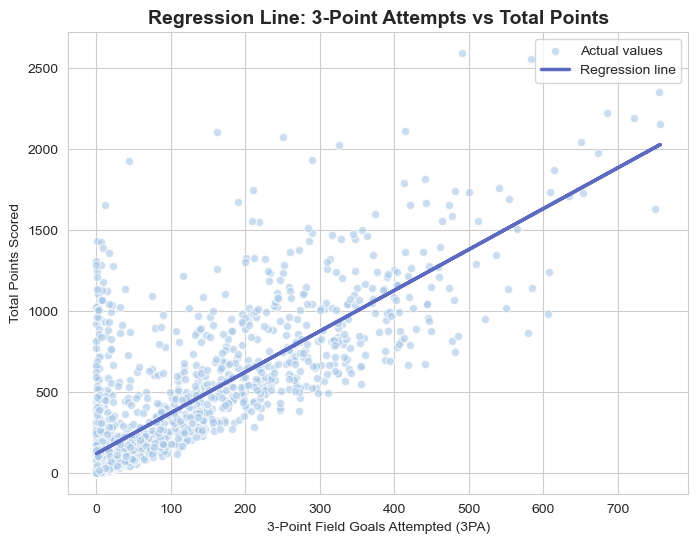

In [15]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
plt.scatter(X_test, y_test, color='#A7C7E7', alpha=0.6, edgecolor='white', label='Actual values')
plt.plot(X_test, y_pred, color='#5C6BC0', linewidth=2.5, label='Regression line')
plt.title('Regression Line: 3-Point Attempts vs Total Points', fontsize=14, fontweight='bold')
plt.xlabel('3-Point Field Goals Attempted (3PA)')
plt.ylabel('Total Points Scored')
plt.legend()
plt.show()

### Regression Line

The regression line was plotted over the test dataset to visualize the relationship between **3-point field goals attempted (3PA)** and **total points**

In [16]:
#Check the model performance statistics—MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 73212.81049890169
R² Score: 0.6094664670678416


### Model Evaluation

The model’s performance was evaluated using two key metrics:

- **Mean Squared Error (MSE):** 73,212.81  
- **R² Score:** 0.609  

The R² value of 0.61 indicates that approximately **61% of the variation in total points scored** can be explained by the number of 3-point field goals attempted. This suggests a moderately strong positive linear relationship between the two variables.

Based on these results, we can **reject the null hypothesis (H₀)** and accept the **alternative hypothesis (H₁)** : confirming that 3-point attempts are a statistically meaningful predictor of total scoring performance in the dataset.

The findings align with modern basketball trends, where increased 3-point shooting volume is strongly associated with higher overall point production.

In [17]:
#Compare the predicted y values with the actual y values in a dataframe.

# Create a DataFrame comparing actual vs predicted y values
comparison_df = pd.DataFrame({
    'Actual Total Points': y_test.flatten(),
    'Predicted Total Points': y_pred.flatten()})

# Display first 10 rows
comparison_df.head(10)

,Actual Total Points,Predicted Total Points
0,301,121.330314
1,1054,1053.878696
2,419,625.410520
3,35,128.891517
4,34,171.738335
5,0,121.330314
6,479,522.074078
7,749,1336.163611
8,1,123.850715
9,1144,1003.470675



To evaluate how closely the model’s predictions matched the real data, a DataFrame was created to compare **actual total points** and **predicted total points**.  

Each row represents one player from the test dataset.  
The values show that the model’s predictions generally follow the same pattern as the real scores, with some small differences due to factors not included in the regression (such as minutes played, free throws, or 2-point attempts).  

This comparison confirms that the linear model captures the main relationship between **3-point attempts (3PA)** and **total points**, though additional variables could further improve predictive accuracy.

### Model Performance and Reflection on Bias

The simple linear regression model performed moderately well, explaining about **61% (R² = 0.61)** of the variance in total points scored based solely on 3-point attempts (3PA).  
This suggests that while 3-point volume is a strong predictor of scoring, other factors—such as minutes played, shooting accuracy, 2-point field goals, and free throws—also contribute significantly to overall point totals.

Visually, the regression line followed the general upward trend of the data, indicating that the model successfully captured the core relationship between 3PA and total points.  
However, the scatter around the line shows variability, suggesting that a simple one-variable model cannot fully explain performance differences between players.

In terms of potential **data bias**, the dataset may overrepresent certain player types or seasons. For instance:
- Players who shoot frequently but inefficiently may distort the relationship between attempts and points.  
- Bench players or injured players with limited minutes could skew the lower end of the trend.  
- The inclusion of multiple seasons might introduce era-based differences in play style (e.g., increasing 3-point focus in recent years).

Despite these limitations, the model provides clear evidence of a **positive and meaningful r**

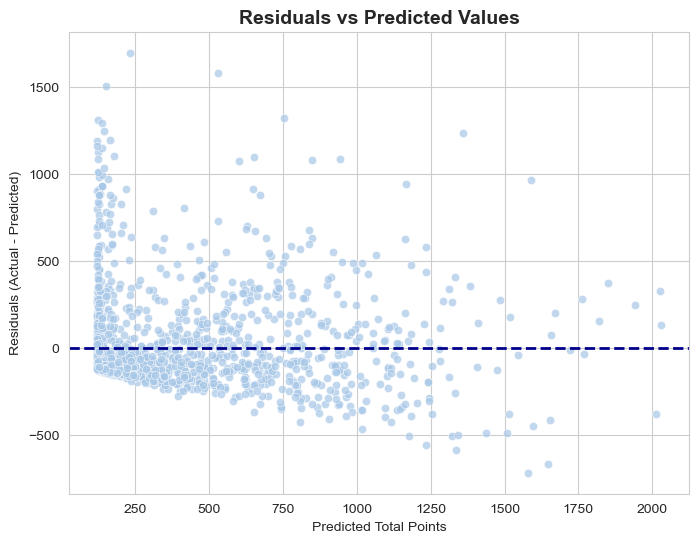

In [21]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred.flatten(), y=residuals.flatten(), color='#A7C7E7', edgecolor='white', alpha=0.7)
plt.axhline(y=0, color='darkblue', linestyle='--', linewidth=2)

plt.title('Residuals vs Predicted Values', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Total Points')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

### Residuals Scatterplot

The residuals scatterplot compares predicted total points to the residuals (Actual- Predicted).  

Most points are evenly distributed around the zero line, which indicates that the model’s prediction errors are fairly random — a good sign that the **linear model is appropriate** for the data.  

However, there’s a slightly wider spread of residuals among lower predicted values, suggesting that the model tends to be less accurate for lower-scoring players (possibly due to greater variability in playing time or limited sample sizes).  

Overall, the residual pattern supports the assumption of **linearity and constant variance**, confirming that the model captures the general trend between **3-point attempts** and **total scoring** effectively.

## Summary: Regression Analysis

This analysis explored the relationship between **3-point field goals attempted (3PA)** and **total points scored** using simple linear regression.  

The regression results showed a strong positive association: players who attempted more 3-pointers generally scored more total points.  
The model achieved an **R² score of 0.61**, indicating that 61% of the variation in scoring can be explained by 3-point attempts alone.  
While this is a solid predictive relationship, it also highlights that other variables—such as minutes played, shooting accuracy, and free throws—play a meaningful role in scoring outcomes.

Visual inspections of the regression line and residuals confirmed that the **linear model assumptions were met**, with residuals randomly distributed around zero.  
Minor variations in error spread suggest the model could be refined by incorporating additional predictors in future analyses.

Overall, the findings align with modern basketball trends, reinforcing that increased 3-point volume is a significant driver of total scoring performance across players.


In [26]:
path2= '/Users/shantamaraj/Desktop/Basketball Analytics/Visualizations'

In [28]:
#Save Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#Scatterplot
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='3PA', y='total_points', color='#A7C7E7', s=50, alpha=0.7)
plt.title('Relationship Between 3-Point Attempts and Total Points', fontsize=14, fontweight='bold')
plt.xlabel('3-Point Field Goals Attempted (3PA)')
plt.ylabel('Total Points Scored')
plt.savefig(path2 + 'scatterplot_3PA_vs_TotalPoints.png', bbox_inches='tight', dpi=300)
plt.close()

#Regression line plot
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='#A7C7E7', alpha=0.6, edgecolor='white', label='Actual values')
plt.plot(X_test, y_pred, color='#5C6BC0', linewidth=2.5, label='Regression line')
plt.title('Regression Line: 3-Point Attempts vs Total Points', fontsize=14, fontweight='bold')
plt.xlabel('3-Point Field Goals Attempted (3PA)')
plt.ylabel('Total Points Scored')
plt.legend()
plt.savefig(path2 + 'regression_line_3PA_vs_TotalPoints.png', bbox_inches='tight', dpi=300)
plt.close()

#Residuals plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred.flatten(), y=residuals.flatten(), color='#A7C7E7', edgecolor='white', alpha=0.7)
plt.axhline(y=0, color='darkblue', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Total Points')
plt.ylabel('Residuals (Actual - Predicted)')
plt.savefig(path2 + 'residuals_vs_predicted.png', bbox_inches='tight', dpi=300)
plt.close()